<a href="https://colab.research.google.com/github/windi-wulandari/DataScience_Rakamin/blob/main/Introduction_to_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Supervised Learning**

Supervised learning adalah salah satu paradigma dalam machine learning di mana algoritma belajar dari data yang sudah dilabeli atau memiliki informasi target sebelumnya. Dalam supervised learning, setiap contoh data dilengkapi dengan label atau target yang sesuai, yang digunakan sebagai referensi untuk melatih algoritma. Tujuan dari supervised learning adalah untuk mempelajari hubungan atau pola antara fitur (input) dan label (output) dari data yang diberikan, sehingga algoritma dapat membuat prediksi akurat untuk data baru yang belum dilihat sebelumnya
<br><br>

<p align="center">
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20231121154747/Supervised-learning.png" width="500">
<p align="center"><b>Gambar 1. Supervised Learning</b></p>
</p>

## **1.1. Classification**

Classification dalam machine learning adalah proses memprediksi label atau kelas yang tepat untuk suatu instance berdasarkan fitur-fiturnya. Tujuan utama dari algoritma klasifikasi adalah untuk mempelajari pola dari data yang diberikan sehingga dapat mengklasifikasikan data baru ke dalam kelas yang sesuai.
<br><br>


<p align="center">
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*bhFifratH9DjKqMBTeQG5A.gif" width="500">
<p align="center"><b>Gambar 2. Klasifikasi</b></p>
</p>

In [ ]:
# Import library yang dibutuhkan
import pandas as pd

# Proses ekstrak data
data_diabetes = pd.read_csv('diabetes.csv')
data_diabetes.columns = data_diabetes.columns.str.lower()

# Tampilkan hasilnya
display(data_diabetes)

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Import library untuk visualisasi
import plotly.express as px

# Lakukan agregasi
proporsi_diagnosa = data_diabetes.groupby('outcome', as_index = False).agg(total = ('outcome', 'count'))

# Hitung total data
total_data = proporsi_diagnosa['total'].sum()

# Warna
hijau_pucat = '#E0ECE4'
merah = '#FF4B5C'

# Buat pie chart
fig = px.pie(
    values = proporsi_diagnosa['total'],
    names = proporsi_diagnosa['outcome'],
    color_discrete_sequence = [hijau_pucat, merah],
    hole = 0.65
)

# Atur posisi label
fig.update_traces(
    textposition = 'outside',
    textinfo = 'percent+label',
    hovertemplate='<b>%{label}</b><br>%{value} Customers'
)

# Atur luas grafik, hapus legend dan beri judul
fig.update_layout(
    width = 800,
    height = 600,
    showlegend = False,
    margin = dict(l=160, r=200, t=100, b=30),
    title = dict(
        text = f"<b>Proporsi Hasil Diagnosa Pasien</b><br>",
        font = dict(
            size = 25,
            color = '#757882'
        ),
        y = 0.92,
        x = 0.46
    )
)

# Berikan informasi total pelanggan di tengah donut chart
fig.add_annotation(
    text = f'Total Pasien<br><b><span style="font-size: 28px;">{total_data}</b></span>',
    x = 0.5,
    y = 0.5,
    showarrow = False,
    font = dict(size = 30)
)

# Tampilkan grafik
fig.show()

In [ ]:
# Proses memisahkan feature dan target
X = data_diabetes.drop(columns = 'outcome')
y = data_diabetes[['outcome']]

In [ ]:
# Tampilkan feature
display(X)

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
# Tampilkan target
display(y)

,outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Buat objek machine learning
DecTree = DecisionTreeClassifier(
    max_leaf_nodes = 10,
    criterion = 'entropy'
)

# Fitting model
DecTree.fit(X, y)

# Lakukan proses prediksi
predicted = DecTree.predict(X)

In [ ]:
# Hitung metriks evaluasi
from sklearn import metrics

# Menghitung dan mencetak laporan klasifikasi
classification_report = metrics.classification_report(y, predicted)

print(classification_report)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       500
           1       0.70      0.63      0.66       268

    accuracy                           0.78       768
   macro avg       0.75      0.74      0.75       768
weighted avg       0.77      0.78      0.77       768



### **Hasil Klasifikasi (Prediksi Penyakit Diabetes)**

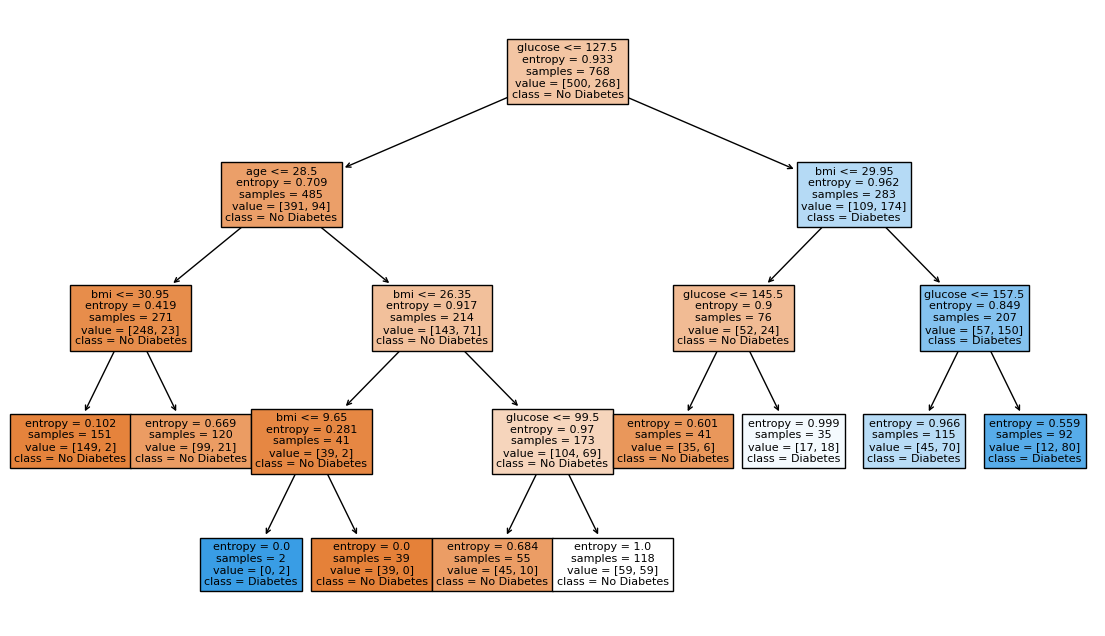

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Membuat plot pohon keputusan
fig, ax = plt.subplots(figsize=(14, 8))

tree.plot_tree(
    DecTree,
    feature_names = DecTree.feature_names_in_,
    class_names = ['No Diabetes', 'Diabetes'],
    filled = True,
    rounded = False,
)

plt.show()

In [ ]:
# Masukan nilai baru
new_data = dict()
for col in X.columns:
    value = input(f'Masukan nilai {col}: ')
    new_data.update({col : value})

# Konversi data baru hasil input
new_data = pd.DataFrame(new_data, index = [0])

# Predict test set labels
result = DecTree.predict(new_data)

if (result[0] == 0):
    print('\nHasil prediksi = No Diabetes')
else:
    print('\nHasil prediksi = Diabetes')

Masukan nilai pregnancies: 1
Masukan nilai glucose: 128
Masukan nilai bloodpressure: 190
Masukan nilai skinthickness: 87
Masukan nilai insulin: 76
Masukan nilai bmi: 30
Masukan nilai diabetespedigreefunction: 90
Masukan nilai age: 24

Hasil prediksi = Diabetes


---
---

## **1.2. Regresi**

Regresi (regression) adalah salah satu metode dalam statistika dan machine learning yang digunakan untuk memodelkan hubungan antara variabel independen (fitur) dan variabel dependen (target) yang bersifat kontinu atau numerik. Tujuan dari regresi adalah untuk memahami dan memprediksi nilai-nilai variabel dependen berdasarkan nilai-nilai variabel independen.
<br><br>

<p align="center">
<img src="https://cdn-images-1.medium.com/v2/resize:fit:640/1*eeIvlwkMNG1wSmj3FR6M2g.gif" width="500">
<p align="center"><b>Gambar 3. Regresi</b></p>
</p>

In [ ]:
# Import library yang dibutuhkan
import pandas as pd

# Proses ekstraksi data
data_houseprice = pd.read_csv('price_house.csv')
data_houseprice = data_houseprice.drop(columns = ['longitude', 'latitude', 'ocean_proximity'])
data_houseprice = data_houseprice.fillna(0)

# Tampilkan hasilnya
display(data_houseprice)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.00,880.00,129.00,322.00,126.00,8.33,452600.00
1,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00
2,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00
3,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00
4,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00
...,...,...,...,...,...,...,...
19643,25.00,1665.00,374.00,845.00,330.00,1.56,78100.00
19644,18.00,697.00,150.00,356.00,114.00,2.56,77100.00
19645,17.00,2254.00,485.00,1007.00,433.00,1.70,92300.00
19646,18.00,1860.00,409.00,741.00,349.00,1.87,84700.00


In [ ]:
# Proses memisahkan feature dan target
X = data_houseprice.drop(columns = ['median_house_value'])
y = data_houseprice[['median_house_value']]

In [ ]:
# Import library untuk regresi linear
from sklearn.linear_model import LinearRegression

# Panggil class Linear Regression
modelLR = LinearRegression()

# Proses fitting model
modelLR.fit(X, y)

LinearRegression()

In [ ]:
# Proses prediksi setelah fitting model
predictions = modelLR.predict(X)

In [ ]:
# Import library evaluasi metrik
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Proses prediksi setelah fitting model
y_pred_train = modelLR.predict(X)

# Evaluasi kinerja model
MSE = mean_squared_error(y, predictions)
MAE = mean_absolute_error(y, predictions)

# Tampilkan hasil
print(f'Mean Squared Error Data Train  : {MSE}')
print(f'Mean Absolute Error Data Train : {MAE}')

Mean Squared Error Data Train  : 4543739115.6725025
Mean Absolute Error Data Train : 50659.58153656655


### **Hasil Regresi (Prediksi Harga Rumah)**

In [ ]:
feature_importance = pd.DataFrame({
    'Feature Name' : modelLR.feature_names_in_.flatten(),
    'Feature Importance' : modelLR.coef_.flatten()
})

feature_importance.sort_values(
    by = 'Feature Importance',
    ascending = False,
    ignore_index = True
)

,Feature Name,Feature Importance
0,median_income,47270.72
1,housing_median_age,1702.10
2,households,153.48
3,total_bedrooms,51.21
4,total_rooms,-18.52
5,population,-28.98


In [ ]:
# Masukan nilai baru
new_data = dict()
for col in X.columns:
    value = input(f'Masukan nilai {col}: ')
    new_data.update({col : value})

# Konversi data baru hasil input
new_data = pd.DataFrame(new_data, index = [0])

# Predict test set labels
result = modelLR.predict(new_data)

print(f'\nPerkiraan Harga Rumah = {result.flatten()[0]}')

Masukan nilai housing_median_age: 10
Masukan nilai total_rooms: 2
Masukan nilai total_bedrooms: 2
Masukan nilai population: 100
Masukan nilai households: 90
Masukan nilai median_income: 26000

Perkiraan Harga Rumah = 1229022822.6900866


---
---

# **2. Unsupervised Learning**

Unsupervised learning adalah paradigma dalam machine learning di mana algoritma belajar dari data yang tidak memiliki label atau target yang telah ditentukan sebelumnya. Dalam unsupervised learning, tujuan utama adalah menemukan pola, struktur, atau informasi tersembunyi dalam data tanpa bantuan label atau informasi eksternal lainnya.
<br><br>

<p align="center">
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20231124111325/Unsupervised-learning.png" width="500">
<p align="center"><b>Gambar 4. Unsupervised Learning</b></p>
</p>

## **2.1. Clustering**

Clustering adalah salah satu metode dalam machine learning yang digunakan untuk mengelompokkan data berdasarkan kesamaan karakteristik atau pola yang dimiliki oleh data tersebut. Tujuan dari clustering adalah untuk menemukan struktur tersembunyi dalam data, di mana data yang serupa dikelompokkan ke dalam kluster yang sama, sedangkan data yang berbeda dikelompokkan ke dalam kluster yang berbeda.
<br><br>

<p align="center">
<img src="https://media.licdn.com/dms/image/C5612AQH8kEizAouznA/article-cover_image-shrink_600_2000/0/1626424726069?e=2147483647&v=beta&t=deUL_yPDFPXK8dkspX2oJZWX1qqyx3XBokl02TN8x9k" width="500">
<p align="center"><b>Gambar 5. Segementasi RFM</b></p>
</p>

In [ ]:
import pandas as pd

rfm_data = pd.read_csv('RFM Summary.csv')

display(rfm_data)

,customer_id,last_transaction,recency,frequency,monetery
0,AA-10315,2017-06-29,5,11,13127.81920
1,AA-10375,2017-12-11,0,15,2583.99800
2,AA-10480,2017-04-15,8,12,5484.60480
3,AA-10645,2017-11-05,1,18,20435.19565
4,AB-10015,2016-11-10,13,6,1969.68800
...,...,...,...,...,...
788,XP-21865,2017-11-17,1,28,7938.71160
789,YC-21895,2017-12-26,0,8,26323.57080
790,YS-21880,2017-12-21,0,12,40920.86560
791,ZC-21910,2017-11-06,1,31,33364.85990


In [ ]:
# Import library min max scaler
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Proses normalisasi data
col_normalized = ['recency', 'frequency', 'monetery']
scaled_data = scaler.fit_transform(rfm_data[col_normalized])

# Tambahkan ke existing dataframe
normalized_df = pd.DataFrame(
    scaled_data,
    columns = ['recency_normalize', 'frequency_normalize', 'monetery_normalize']
)

aggregate = pd.concat([aggregate, normalized_df], axis = 1)
display(aggregate)

,customer_id,last_transaction,recency,frequency,monetery,recency_normalize,frequency_normalize,monetery_normalize,recency_normalize,frequency_normalize,monetery_normalize
0,AA-10315,2017-06-29,5,11,13127.81920,0.135135,0.277778,0.092673,0.135135,0.277778,0.092673
1,AA-10375,2017-12-11,0,15,2583.99800,0.000000,0.388889,0.018223,0.000000,0.388889,0.018223
2,AA-10480,2017-04-15,8,12,5484.60480,0.216216,0.305556,0.038704,0.216216,0.305556,0.038704
3,AA-10645,2017-11-05,1,18,20435.19565,0.027027,0.472222,0.144269,0.027027,0.472222,0.144269
4,AB-10015,2016-11-10,13,6,1969.68800,0.351351,0.138889,0.013886,0.351351,0.138889,0.013886
...,...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,2017-11-17,1,28,7938.71160,0.027027,0.750000,0.056033,0.027027,0.750000,0.056033
789,YC-21895,2017-12-26,0,8,26323.57080,0.000000,0.194444,0.185847,0.000000,0.194444,0.185847
790,YS-21880,2017-12-21,0,12,40920.86560,0.000000,0.305556,0.288918,0.000000,0.305556,0.288918
791,ZC-21910,2017-11-06,1,31,33364.85990,0.027027,0.833333,0.235565,0.027027,0.833333,0.235565


In [ ]:
# Import library yang dibutuhkan
from sklearn.cluster import KMeans

X = aggregate[['recency_normalize',	'frequency_normalize',	'monetery_normalize']]

# Inisialisasi model digunakan
modelKM = KMeans(
    n_clusters = 8
)

# Fitting model
modelKM.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans()

In [ ]:
# Mendapatkan hasil
rfm_data['segmentation'] = modelKM.labels_

In [ ]:
import plotly.graph_objects as go

# Membuat plot 3D
fig = go.Figure(
    data = [
        go.Scatter3d(
            x = rfm_data['recency'],
            y = rfm_data['frequency'],
            z = rfm_data['monetery'],
            mode = 'markers',
            marker = dict(
                size = 5,
                color = rfm_data['segmentation'],
                opacity = 0.5,
                colorbar = dict(title='Color Legend')
            ),
            hovertext = rfm_data['segmentation'],
            hovertemplate='Customer Type : %{hovertext}<br>Recency: %{x}<br>Frequency: %{y}<br>Monetery: %{z}'
        )
    ]
)


fig.update_layout(
    width = 700,
    height = 700,
    title = dict(
        text = '<b>Customer Segmentation</b>',
        font = dict(
            size = 20
        )
    ),
    scene = dict(
        xaxis_title = 'Recency',
        yaxis_title = 'Frequency',
        zaxis_title = 'Monetery'
    )
)

# Tampilkan plot
fig.show()

### **Hasil Clustering (RFM Segmentation)**

<p align="center">
<img src="https://blog.rsquaredacademy.com/img/rfm_segments_table.png" width="800">
<p align="center"><b>Gambar 3. Segementasi RFM</b></p>
</p>

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

rfm_data.groupby('segmentation', as_index = False).agg(
    min_frequency = ('frequency', 'min'),
    median_frequency = ('frequency', 'median'),
    max_frequency = ('frequency', 'max'),
    min_monetery = ('monetery', 'min'),
    median_monetery = ('monetery', 'median'),
    max_monetery = ('monetery', 'max'),
).sort_values(
    by = ['min_monetery', 'max_monetery'],
    ignore_index = True
)

,segmentation,min_frequency,median_frequency,max_frequency,min_monetery,median_monetery,max_monetery
0,1,1,7.00,12,3.13,3062.52,31925.16
1,7,1,7.00,10,69.79,3405.96,25851.32
2,4,1,6.00,19,193.44,3833.60,36883.90
3,5,8,13.00,19,1010.80,6765.87,29988.93
4,2,8,12.00,15,1057.35,9969.95,37370.01
5,0,16,19.00,24,2566.22,12109.30,31709.42
6,3,22,26.00,37,7141.63,25082.58,69261.15
7,6,5,15.00,23,34859.17,48341.77,141627.40


---
---